In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.tools.plotting import table

In [2]:
def plot_heat_map(table,title=""):
    plt.pcolor(table)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(title)
    plt.show()

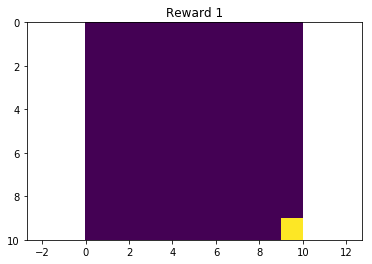

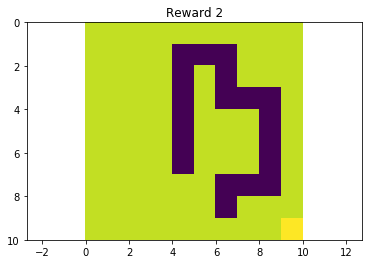

In [19]:
# QUESTION 1

reward_table_1 = np.zeros((10,10))
reward_table_1[9,9] = 1

reward_table_2 = np.zeros((10,10))
reward_table_2[1:7,4] = -100
reward_table_2[1,5] = -100
reward_table_2[1:4,6] = -100
reward_table_2[7:9,6] = -100
reward_table_2[3,7] = -100
reward_table_2[7,7] = -100
reward_table_2[3:8,8] = -100
reward_table_2[9,9] = 10

# Plot Rewards
plot_heat_map(reward_table_1,"Reward 1")
plot_heat_map(reward_table_2,"Reward 2")

In [4]:
# QUESTION 2: Value Iteration

def value_iteration(reward, estimation_step, w, gamma):
    # Initialization Step
    V = np.zeros(reward.shape)
    P = np.zeros(reward.shape)
    delta = float('inf')
    
    iteration = 0
    while delta > estimation_step:
        delta = 0
        # Value estimation step
        for r in range(V.shape[0]):
            for c in range(V.shape[1]):

                # Get the value for each action and store the max value
                best_action_value = -float('inf')
                
                # By default the best action is 'up'
                best_action = 0 
                
                for a in range(4):
                    action_value = 0
                    # For each actual executed action, get the state-action value
                    for ex in range(4):

                        # Get s', given the resulting action (not necessarily the action chosen by agent)

                        # Case where the resulting action is "up"
                        if ex == 0:
                            next_r, next_c = (max(r-1,0), c)
                        # Case where the resulting action is "left"
                        elif ex == 1:
                            next_r, next_c = (r, max(c-1,0))
                        # Case where the resulting action is "down"
                        elif ex == 2:
                            next_r, next_c = (min(r+1, V.shape[0]-1), c)
                        # Case where the resulting action is "right"
                        elif ex == 3:
                            next_r, next_c = (r, min(c+1, V.shape[1]-1))

                        # Get the probability that s' is visited, given the s and a
                        execution_probability = (w / 4) # all of the neighboring states have a w/4 chance of being visited

                        # If the executed action is the same as the chosen action, this has a higher probability
                        if ex == a:
                            execution_probability += (1-w)

                        # Compute the value if the agent at state s picks action a, and ends up at [next_r, next_c]
                        action_value += (execution_probability) * (reward[next_r,next_c] + gamma*V[next_r,next_c])

                    # This is essentially maximizing the value with respect to each possible action
                    if action_value > best_action_value:
                        best_action_value = action_value
                        best_action = a

                delta = max(delta, abs(V[r][c] - best_action_value))
                V[r][c] = best_action_value 
                P[r][c] = best_action
            iteration += 1
    return V,P

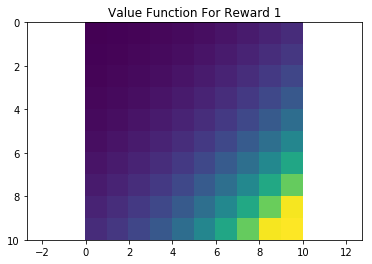

In [6]:
# Question 3: run value iteration and generate heat map on reward 1
estimation_step = 0.01
random_action_prob = 0.1
gamma = 0.8
V,P = value_iteration(reward_table_1, estimation_step, random_action_prob, gamma)
plot_heat_map(V, "Value Function For Reward 1")

In [7]:
pd.DataFrame(V)

,0,1,2,3,4,5,6,7,8,9
0,0.041796,0.062838,0.089742,0.123849,0.167081,0.221883,0.291354,0.379420,0.490983,0.609648
1,0.062838,0.087870,0.121557,0.164514,0.219246,0.288990,0.377871,0.491061,0.633219,0.787354
2,0.089742,0.121557,0.164390,0.219132,0.288903,0.377826,0.491156,0.635490,0.817355,1.018597
3,0.123849,0.164514,0.219132,0.288900,0.377825,0.491159,0.635601,0.819610,1.052191,1.315059
4,0.167081,0.219246,0.288903,0.377825,0.491159,0.635603,0.819695,1.054265,1.351572,1.695073
5,0.221883,0.288990,0.377826,0.491159,0.635603,0.819696,1.054322,1.353324,1.733180,2.182231
6,0.291354,0.377871,0.491156,0.635601,0.819695,1.054322,1.353351,1.734461,2.219527,2.806802
7,0.379420,0.491061,0.635490,0.819610,1.054265,1.353324,1.734461,2.220201,2.839257,3.607626
8,0.490983,0.633219,0.817355,1.052191,1.351572,1.733180,2.219527,2.839257,3.628814,4.634547
9,0.609648,0.787354,1.018597,1.315059,1.695073,2.182231,2.806802,3.607626,4.634547,4.701540


In [8]:
## Question 4: Explain the distribution

# The only reward is at the bottom right, so it makes sense that the value function is higher there.
# The value should decrease as you get away from the reward because we have a discount factor less than one.
# This means if the agent starts at the top left corner, it has a low value because it needs many steps to reach the reward.


In [9]:
# Question 5: Get the policy from the value

# Outputting the policy is already implemented in the value_iteration() method to prevent writing unnecessary code
# We will just implement the plotting of the policy with quivers

def plot_policy(P,title=""):
    U = np.zeros(P.shape)
    V = np.zeros(P.shape)
    for r in range(P.shape[0]):
        for c in range(P.shape[1]):
            # If policy says go up
            if P[r][c] == 0:
                U[r][c], V[r][c] = 0,1
            # If policy says go left
            elif P[r][c] == 1:
                U[r][c], V[r][c] = -1,0
            # If policy says go down
            elif P[r][c] == 2:
                U[r][c], V[r][c] = 0,-1
            # If policy says go right
            elif P[r][c] == 3:
                U[r][c], V[r][c] = 1,0
    plt.quiver(U,V)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(title)
    plt.show()

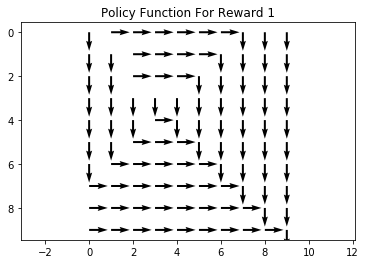

In [10]:
plot_policy(P,"Policy Function For Reward 1")

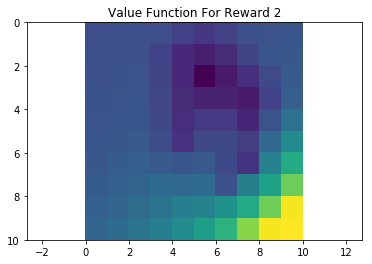

In [11]:
# Question 6, 7: Find the optimal values for Reward 2
estimation_step = 0.01
random_action_prob = 0.1
gamma = 0.8
V_2,P_2 = value_iteration(reward_table_2, estimation_step, random_action_prob, gamma)
plot_heat_map(V_2, "Value Function For Reward 2")

In [12]:
pd.DataFrame(V_2)

,0,1,2,3,4,5,6,7,8,9
0,0.648477,0.794107,0.825238,0.536246,-2.370432,-4.233817,-1.920530,1.131108,1.594356,2.038207
1,0.829852,1.021236,1.066033,-1.867904,-6.738219,-8.673754,-6.369795,-1.294796,1.928343,2.610469
2,1.063610,1.316513,1.450077,-1.624025,-6.741509,-13.911182,-9.649225,-5.511043,-0.131013,3.359059
3,1.360252,1.692699,1.948023,-1.232169,-6.323085,-7.977606,-7.936680,-9.423869,-1.914428,4.390625
4,1.736572,2.171602,2.589833,-0.725587,-5.830730,-3.253626,-3.230200,-7.419062,1.718982,9.163101
5,2.213933,2.781084,3.417100,-0.027563,-5.098662,-0.549015,-0.476653,-2.967563,6.586522,15.357329
6,2.819423,3.556504,4.482395,3.028072,2.484033,2.884093,-0.454636,-4.894882,12.692277,23.299955
7,3.587378,4.542737,5.796132,7.291987,6.722347,7.244849,0.941170,12.370385,21.162739,33.486138
8,4.561331,5.798264,7.400767,9.443019,12.011765,12.892754,17.101043,23.017541,33.781812,46.532351
9,5.730000,7.319638,9.391159,12.048251,15.455919,19.827538,25.501069,36.161155,46.586943,47.315032


In [13]:
# Question 8: Explain the distribution

# Close to the reward is still good, with low values near the dangerous territory with reward -100.

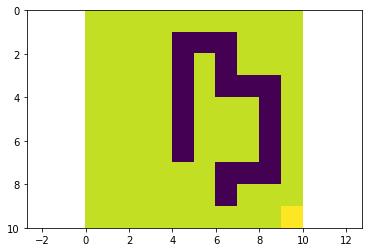

In [14]:
# Question 9: Plot the policy
(P_2,"Policy Function For Reward 2")
plot_heat_map(reward_table_2)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers


import time

# start = time.time()
# print("hello")
# end = time.time()
# print(end - start)

In [10]:

# Define Probability Function P_{SS'}^{a}
def probability(currS, nextS, move, prob):
    left = currS + actions[0]
    up = currS + actions[1]
    right = currS + actions[2]
    down = currS + actions[3]
    if nextS == left:
        if move == 0:
            return 1-prob+prob/4
        else:
            return prob/4
    elif nextS == up:
        if move == 1:
            return 1-prob+prob/4
        else:
            return prob/4
    elif nextS == right:
        if move == 2:
            return 1-prob+prob/4
        else:
            return prob/4
    elif nextS == down:
        if move == 3:
            return 1-prob+prob/4
        else:
            return prob/4
    elif nextS == currS:
        record = 0
        if left < 0:
            if move == 0:
                record += (1-prob+prob/4)
            else:
                record += prob/4
        if right > 99:
            if move == 2:
                record += (1-prob+prob/4)
            else:
                record += prob/4
        if up % 10 == 9:
            if move == 1:
                record += (1-prob+prob/4)
            else:
                record += prob/4
        if down % 10 == 0:
            if move == 3:
                record += (1-prob+prob/4)
            else:
                record += prob/4
        return record
    else:
        return 0


# Procedure Value Iteration
def compute(currS, move, prob, gamma, reward, values):
    left = currS + actions[0]
    right = currS + actions[2]
    up = currS + actions[1]
    down = currS + actions[3]
    neighbours = [left, right, up, down, currS]
    result = 0
    for neigh in neighbours:
        if neigh < 0 or neigh > 99 or (currS % 10 == 0 and neigh % 10 == 9) or (currS % 10 == 9 and neigh % 10 == 0):
            continue
        result += probability(currS, neigh, move, prob) * (reward[neigh] + gamma * values[neigh])
    return result


def optimal_state_val(values, w, gamma, reward, threshold):
    # 1) Initialization
    for state in range(100):
        values[state] = 0
    # 2) Estimation
    delta = float('inf')
    while delta > threshold:
        delta = 0
        temp = values[:]
        for state in range(100):
            v = values[state]
            values[state] = max(compute(state, 0, w, gamma, reward, temp),
                                compute(state, 1, w, gamma, reward, temp),
                                compute(state, 2, w, gamma, reward, temp),
                                compute(state, 3, w, gamma, reward, temp))
            delta = max(delta, abs(v - values[state]))
    return values

In [11]:
# get transition probabilities where all actions are same
def raw_matrix(length, w, direction):
    s = length * length
    res = np.zeros(s * s).reshape(s, s)
    main_possibility = 1 - w
    random_possibility = w / 4
    for row in range(s):
        nexts = next_states(length, row)
        if direction == "up":
            res[row][nexts[0]] = main_possibility
        elif direction == "down":
            res[row][nexts[1]] = main_possibility
        elif direction == "left":
            res[row][nexts[2]] = main_possibility
        elif direction == "right":
            res[row][nexts[3]] = main_possibility
        for col in nexts:
            res[row][col] += random_possibility
    return res
        
def next_states(length, cur_state):
    x = cur_state % length
    y = cur_state // length
    up = cur_state - 1
    down = cur_state + 1
    left = cur_state - length
    right = cur_state + length
    if x == 0:
        up = cur_state
    if x == length - 1:
        down = cur_state
    if y == 0:
        left = cur_state
    if y == length - 1:
        right = cur_state
    return np.array([up, down, left, right])

In [12]:
# get c, D, b arguments for solving LP later
def get_c_D_b(exp_action, P_actions, lam, rmax):
    # create P_exp(P_a1), P_ag1(P_a), P_ag2(P_a), P_ag3(P_a)
    P_exp = []
    P_ags = []
    P_ags.append([])
    P_ags.append([])
    P_ags.append([])
    for state in range(100):
        exp_act = exp_action[state]
        agent = 0
        for action in range(4):
            if action == exp_act:
                P_exp.append(P_actions[action][state])
            else:
                P_ags[agent].append(P_actions[action][state])
                agent += 1

    I = np.eye(100)
    zero = np.zeros(100 * 100).reshape(100, 100)
    D = np.concatenate((zero, zero, zero, zero))
    D = np.concatenate((D, np.concatenate((-I, -I, zero, zero)), 
                        np.concatenate((I, -I, I, -I))), 1)
 
    for Pa in P_ags:
        # (Pa-Pa1)(I-ga*Pa1)^(-1)
        temp = np.dot((np.array(Pa) - np.array(P_exp)), 
                      np.linalg.inv(np.eye(100) - 0.8 * np.array(P_exp)))
        temp_row1 = np.concatenate((I, zero, temp), 1)
        temp_row2 = np.concatenate((zero, zero, temp), 1)
        temp = np.concatenate((temp_row1, temp_row2))
        D = np.concatenate((temp, D))
        
    c1 = np.array([1. for _ in range(100)])
    c2 = np.array([-lam for _ in range(100)])
    c3 = np.array([0.0 for _ in range(100)])
    c = np.concatenate((c1, c2, c3), axis=0)
    c = -c
    b1 = np.array([0.0 for _ in range(800)])
    b2 = np.array([rmax for _ in range(200)])
    b = np.concatenate((b1, b2), axis=0)
    return c, D, b

In [13]:
# solve a LP to get reward
def get_reward(c, D, b):
    A = matrix(D)
    b = matrix(b)
    c = matrix(c)
    solvers.options['show_progress'] = False
    sol=solvers.lp(c,A,b)
    return sol['x'][-100:]

In [14]:
def sweep(exp_action, rmax):
    acc_list = []
    lam_list = []
    lam = 0
    for i in range(501):
        c, D, b = get_c_D_b(exp_action, P_acts, lam, rmax)
        reward = np.array(get_reward(c, D, b))
        value = optimal_state_val(values, w, gamma, reward, thres)
        # OA
        agent_action = [0 for _ in range(100)]
        for state in range(100):
            agent_action[state] = np.argmax([compute(state, 0, w, gamma, reward, value),
                                             compute(state, 1, w, gamma, reward, value),
                                             compute(state, 2, w, gamma, reward, value),
                                             compute(state, 3, w, gamma, reward, value)])
        count = 0
        for j, k in zip(exp_action, agent_action):
            if j == k:
                count += 1
        acc = count / len(agent_action)
        
        print("lambda: " + str(lam) + "  acc: " + str(acc))
        acc_list.append(acc)
        lam_list.append(lam)
        lam += 0.01
    return lam_list, acc_list

lambda: 0  acc: 0.82
lambda: 0.01  acc: 0.81
lambda: 0.02  acc: 0.81
lambda: 0.03  acc: 0.81
lambda: 0.04  acc: 0.81
lambda: 0.05  acc: 0.81
lambda: 0.060000000000000005  acc: 0.73
lambda: 0.07  acc: 0.73
lambda: 0.08  acc: 0.73
lambda: 0.09  acc: 0.73
lambda: 0.09999999999999999  acc: 0.73
lambda: 0.10999999999999999  acc: 0.73
lambda: 0.11999999999999998  acc: 0.73
lambda: 0.12999999999999998  acc: 0.73
lambda: 0.13999999999999999  acc: 0.73
lambda: 0.15  acc: 0.73
lambda: 0.16  acc: 0.73
lambda: 0.17  acc: 0.73
lambda: 0.18000000000000002  acc: 0.73
lambda: 0.19000000000000003  acc: 0.74
lambda: 0.20000000000000004  acc: 0.72
lambda: 0.21000000000000005  acc: 0.72
lambda: 0.22000000000000006  acc: 0.73
lambda: 0.23000000000000007  acc: 0.73
lambda: 0.24000000000000007  acc: 0.73
lambda: 0.25000000000000006  acc: 0.73
lambda: 0.26000000000000006  acc: 0.73
lambda: 0.2700000000000001  acc: 0.73
lambda: 0.2800000000000001  acc: 0.73
lambda: 0.2900000000000001  acc: 0.73
lambda: 0.30000

lambda: 2.2199999999999966  acc: 0.92
lambda: 2.2299999999999964  acc: 0.93
lambda: 2.239999999999996  acc: 0.92
lambda: 2.249999999999996  acc: 0.92
lambda: 2.259999999999996  acc: 0.92
lambda: 2.2699999999999956  acc: 0.92
lambda: 2.2799999999999954  acc: 0.92
lambda: 2.289999999999995  acc: 0.92
lambda: 2.299999999999995  acc: 0.92
lambda: 2.3099999999999947  acc: 0.92
lambda: 2.3199999999999945  acc: 0.92
lambda: 2.3299999999999943  acc: 0.93
lambda: 2.339999999999994  acc: 0.92
lambda: 2.349999999999994  acc: 0.92
lambda: 2.3599999999999937  acc: 0.92
lambda: 2.3699999999999934  acc: 0.92
lambda: 2.3799999999999932  acc: 0.92
lambda: 2.389999999999993  acc: 0.92
lambda: 2.399999999999993  acc: 0.92
lambda: 2.4099999999999926  acc: 0.92
lambda: 2.4199999999999924  acc: 0.92
lambda: 2.429999999999992  acc: 0.92
lambda: 2.439999999999992  acc: 0.92
lambda: 2.4499999999999917  acc: 0.92
lambda: 2.4599999999999915  acc: 0.92
lambda: 2.4699999999999913  acc: 0.92
lambda: 2.4799999999999

lambda: 4.41999999999995  acc: 0.9
lambda: 4.42999999999995  acc: 0.9
lambda: 4.43999999999995  acc: 0.91
lambda: 4.4499999999999496  acc: 0.9
lambda: 4.459999999999949  acc: 0.91
lambda: 4.469999999999949  acc: 0.91
lambda: 4.479999999999949  acc: 0.91
lambda: 4.489999999999949  acc: 0.91
lambda: 4.4999999999999485  acc: 0.9
lambda: 4.509999999999948  acc: 0.91
lambda: 4.519999999999948  acc: 0.91
lambda: 4.529999999999948  acc: 0.92
lambda: 4.539999999999948  acc: 0.92
lambda: 4.549999999999947  acc: 0.91
lambda: 4.559999999999947  acc: 0.92
lambda: 4.569999999999947  acc: 0.92
lambda: 4.579999999999947  acc: 0.92
lambda: 4.589999999999947  acc: 0.92
lambda: 4.599999999999946  acc: 0.92
lambda: 4.609999999999946  acc: 0.92
lambda: 4.619999999999946  acc: 0.91
lambda: 4.629999999999946  acc: 0.92
lambda: 4.6399999999999455  acc: 0.92
lambda: 4.649999999999945  acc: 0.92
lambda: 4.659999999999945  acc: 0.92
lambda: 4.669999999999945  acc: 0.92
lambda: 4.679999999999945  acc: 0.91
lambd

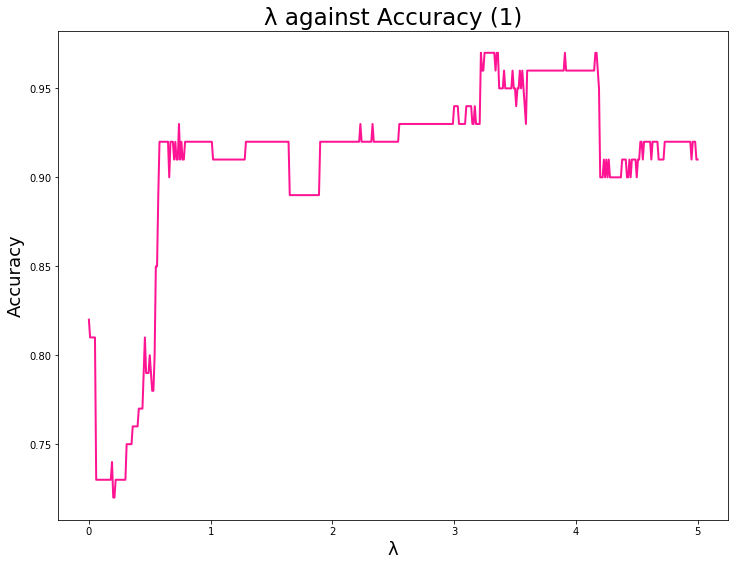

132.4958930015564


In [15]:
start = time.time()




# Create Environment of the Agent
values = [0 for _ in range(100)]
thres = 0.01
actions = [-10, -1, 10, 1] # left, up, right, down
w = 0.1
gamma = 0.8

# record expert actions
reward1 = [[0 for _ in range(10)] for _ in range(10)]
reward1[9][9] = 1
reward_1 = []
reward1 = np.array(reward1).transpose()
for lines in reward1:
    reward_1 += list(lines)
exp_action = [0 for _ in range(100)]
values = optimal_state_val(values, w, gamma, reward_1, thres)
for state in range(100):
    exp_action[state] = np.argmax([compute(state, 0, w, gamma, reward_1, values),
                                   compute(state, 1, w, gamma, reward_1, values),
                                   compute(state, 2, w, gamma, reward_1, values),
                                   compute(state, 3, w, gamma, reward_1, values)])

P_acts = []
P_acts.append(raw_matrix(10, 0.1, "left"))
P_acts.append(raw_matrix(10, 0.1, "up"))
P_acts.append(raw_matrix(10, 0.1, "right"))
P_acts.append(raw_matrix(10, 0.1, "down"))

lam_list, acc_list = sweep(exp_action, 1.0)

# plot figure
plt.figure(figsize=(12,9))
plt.xlabel('λ', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('λ against Accuracy (1)', fontsize=23)
plt.plot(lam_list, acc_list, color="deeppink", lw=2)
plt.show()

end = time.time()
print(end - start)